## MiniBatch K-Means
特点
MiniBatch K-Means 是 K-Means 的变体，使用小批量数据更新质心，从而大幅提升计算效率。
适合处理大规模数据或内存受限的场景。

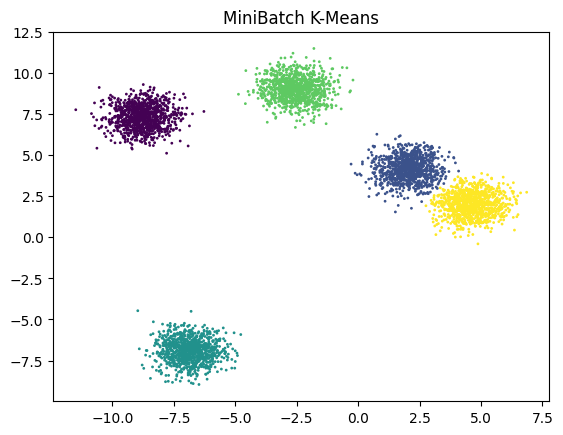

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs

# Generate synthetic large-scale data
X, y_true = make_blobs(n_samples=100000, centers=5, cluster_std=0.7, random_state=42)

# MiniBatch K-Means
model = MiniBatchKMeans(n_clusters=5, batch_size=1000, random_state=42)
y_pred = model.fit_predict(X)

# Plot a subset of the results for visualization
plt.scatter(X[:5000, 0], X[:5000, 1], c=y_pred[:5000], cmap='viridis', s=1)
plt.title("MiniBatch K-Means")
plt.show()


## Birch (Balanced Iterative Reducing and Clustering using Hierarchies)
特点:
1. Birch 构建一个树状结构（CF Tree），对数据进行多阶段聚类。
2. 高效处理大规模数据，同时具有在线学习能力。

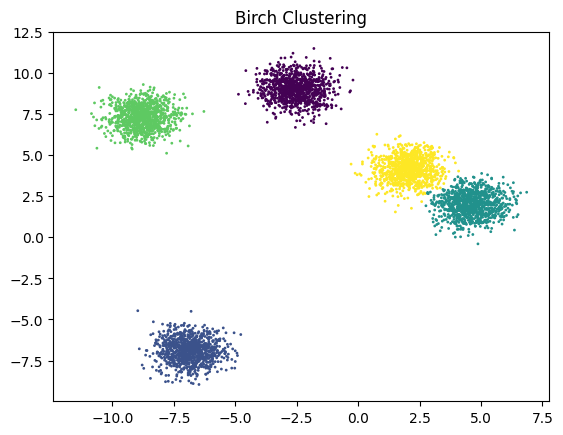

In [2]:
from sklearn.cluster import Birch

# Birch clustering
model = Birch(n_clusters=5)
y_pred = model.fit_predict(X)

# Plot a subset of the results for visualization
plt.scatter(X[:5000, 0], X[:5000, 1], c=y_pred[:5000], cmap='viridis', s=1)
plt.title("Birch Clustering")
plt.show()


## DBSCAN with Approximation
特点:
1. DBSCAN 是密度聚类的经典方法，但对大规模数据计算开销较大。
2. 结合随机采样或稀疏化相似性矩阵可以提升效率。

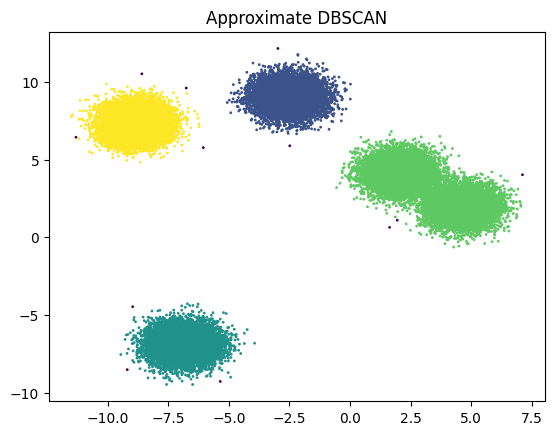

In [3]:
from sklearn.cluster import DBSCAN

# Approximate DBSCAN (use subset of data for demonstration)
subset = X[:50000]
model = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
y_pred = model.fit_predict(subset)

# Plot a subset of the results for visualization
plt.scatter(subset[:, 0], subset[:, 1], c=y_pred, cmap='viridis', s=1)
plt.title("Approximate DBSCAN")
plt.show()


## Online K-Means
特点:
1. Online K-Means 是基于流数据设计的变体，每次处理一部分数据。
2. 适合动态数据更新的场景。

属于sklearn增量学习模块，但需要手动处理数据分块和模型更新。

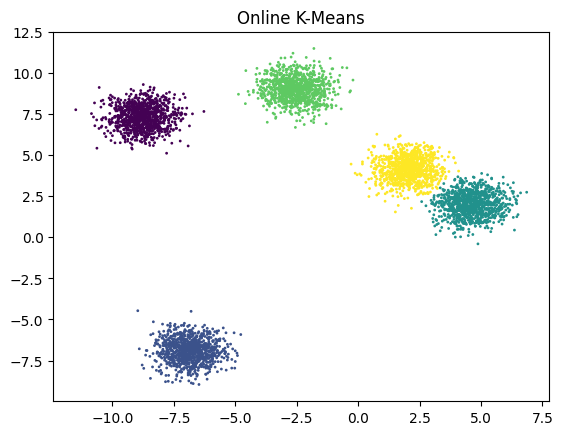

In [5]:
from sklearn.cluster import MiniBatchKMeans

# Online K-Means simulation
model = MiniBatchKMeans(n_clusters=5, random_state=42)
chunk_size = 10000  # Process data in chunks
for i in range(0, len(X), chunk_size):
    chunk = X[i:i + chunk_size]
    model.partial_fit(chunk)

# Predict on entire dataset
y_pred = model.predict(X)

# Plot a subset of the results for visualization
plt.scatter(X[:5000, 0], X[:5000, 1], c=y_pred[:5000], cmap='viridis', s=1)
plt.title("Online K-Means")
plt.show()


## HDBSCAN for Large Data
特点：
1. HDBSCAN 的原始实现可能对大规模数据较慢。
2. 对大数据可以结合随机采样或 GPU 加速实现。

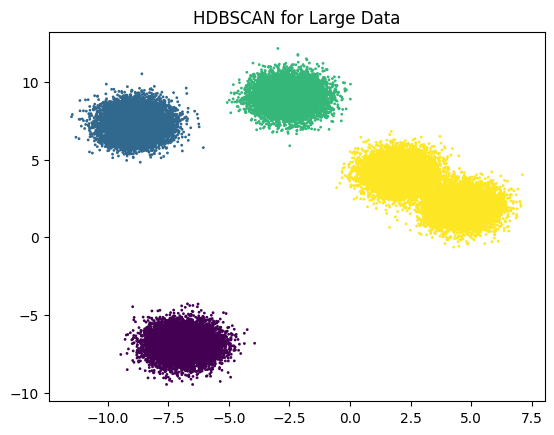

In [16]:
from hdbscan import HDBSCAN

# HDBSCAN clustering
subset = X[:50000]
model = HDBSCAN(min_cluster_size=75, min_samples=5) # 聚类效果受clustersize影响，75的时候右侧点被分到一类，80的时候右侧点被分到三类
model = HDBSCAN(min_cluster_size=80, min_samples=5)

y_pred = model.fit_predict(subset)

# Plot a subset of the results for visualization
plt.scatter(subset[:, 0], subset[:, 1], c=y_pred, cmap='viridis', s=1)
plt.title("HDBSCAN for Large Data")
plt.show()


## 使用随机投影
特点：
对于高维数据，可以结合随机投影降维来加速聚类。

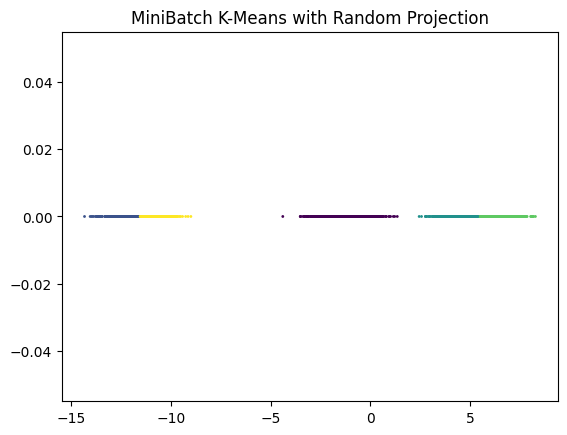

In [17]:
from sklearn.random_projection import SparseRandomProjection

# Random projection to reduce dimensions
projection = SparseRandomProjection(n_components=2, random_state=42)
X_reduced = projection.fit_transform(X)

# MiniBatch K-Means on reduced data
model = MiniBatchKMeans(n_clusters=5, batch_size=1000, random_state=42)
y_pred = model.fit_predict(X_reduced)

# Plot results
plt.scatter(X_reduced[:5000, 0], X_reduced[:5000, 1], c=y_pred[:5000], cmap='viridis', s=1)
plt.title("MiniBatch K-Means with Random Projection")
plt.show()


### **总结**
| **算法**                   | **特点**                                   | **适用场景**                   |
|----------------------------|--------------------------------------------|--------------------------------|
| **MiniBatch K-Means**      | 小批量更新质心，快速处理大规模数据          | 任意形状簇，内存有限场景       |
| **Birch**                  | 构建层次结构，高效处理大规模数据            | 簇分布稠密，层次性数据         |
| **Approximate DBSCAN**     | 随机采样或稀疏化相似性矩阵，提升效率        | 任意形状簇，密度变化明显数据   |
| **Online K-Means**         | 动态更新质心，适合流数据                   | 流式数据更新场景              |
| **HDBSCAN for Large Data** | 随机采样或优化实现，处理复杂密度结构        | 密度变化大，任意形状簇         |
| **Random Projection**      | 降维后聚类，提升高维数据聚类效率            | 高维数据场景                  |
